#TODO
*Understand the labels.  
*if one subject both eye has disease, by just seeing encoded label how can we know which label is assosiated with which eye.  
*For example if we consider left fundus only , and its noraml, but the right fundus is not normal, one hot encoded would not show the normal one(left fundus), but it depict the disease one. which is a sort of mislabeling for left fundus 

#heling material
https://github.com/ivashnyov/ODIR/issues/1  
https://github.com/nnnnew/ODIR  
https://github.com/DecentMakeover/odir_winningsubmission

# read data from directory

In [1]:
#connect drive with colab notebook
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#show content in working directory
ls

drive/  sample_data/


In [0]:
#cd drive/My\ Drive/ghina/thesis

#extract data

In [0]:
import pandas as pd

In [5]:
#following are libraries to unpack 7z file
!pip install patool 
!pip install pyunpack
from pyunpack import Archive

     |████████████████████████████████| 81kB 4.2MB/s 
  Created wheel for pyunpack: filename=pyunpack-0.1.2-cp36-none-any.whl size=5162 sha256=48c6ffb7fd9f14a167119bfa119f362daf7ec8a6551553a1eb8d4ad6df08059d
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
Successfully built pyunpack


In [0]:
#create a folder name as data
!mkdir data

In [0]:
#path where our data is saved
path='/content/drive/My Drive/ghina/thesis/'

In [0]:
#extract the 7z file in data folder we created above
#this not only extract the data but move it from drive to colab for efficinet processing
#it will take some time
Archive(path+'ODIR-5K_Training_Images.7z').extractall('data')

In [0]:
#read the annottion file
annotation=pd.read_excel(path+'ODIR-5K_Training_Annotations(Updated)_V2.xlsx')

In [0]:
#normal (N), diabetes (D), glaucoma (G), cataract (C), AMD (A), hypertension (H), myopia (M) and other diseases/abnormalities (O) 

In [18]:
#print first 5 rows of annotation file
annotation.head(10)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
5,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0
6,6,60,Male,6_left.jpg,6_right.jpg,macular epiretinal membrane,moderate non proliferative retinopathy，epireti...,0,1,0,0,0,0,0,1
7,7,60,Female,7_left.jpg,7_right.jpg,drusen,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1
8,8,59,Male,8_left.jpg,8_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
9,9,54,Male,9_left.jpg,9_right.jpg,normal fundus,vitreous degeneration,0,0,0,0,0,0,0,1


In [15]:
annotation['Left-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                      1433
moderate non proliferative retinopathy                              366
mild nonproliferative retinopathy                                   220
cataract                                                            135
pathological myopia                                                 111
lens dust，normal fundus                                             110
glaucoma                                                            104
dry age-related macular degeneration                                 93
severe nonproliferative retinopathy                                  70
drusen                                                               66
epiretinal membrane                                                  54
hypertensive retinopathy                                             53
macular epiretinal membrane                                          49
normal fundus，lens dust                                         

In [16]:
annotation['Right-Diagnostic Keywords'].value_counts().head(30)

normal fundus                                                         1383
moderate non proliferative retinopathy                                 379
mild nonproliferative retinopathy                                      240
cataract                                                               127
pathological myopia                                                    116
lens dust，normal fundus                                                112
dry age-related macular degeneration                                   103
glaucoma                                                                96
severe nonproliferative retinopathy                                     74
drusen                                                                  72
macular epiretinal membrane                                             71
epiretinal membrane                                                     55
hypertensive retinopathy                                                51
myelinated nerve fibers  

#read single image

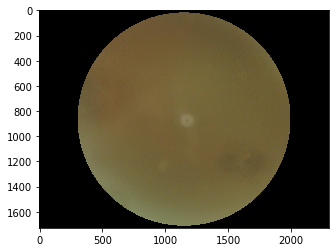

In [73]:
#read a single image from data and display it
import cv2 #for reading images
import matplotlib.pyplot as plt # for displaying images

image=cv2.imread('data/ODIR-5K_Training_Dataset/0_left.jpg')
#cv2 read image in BGR format, and plt displaying image in RGB format. SO we need to convert BGR2RGB
image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
plt.imshow(image) #display image


In [74]:
#now read all image in left fundus column
for img_file,disease in zip(annotation['Left-Fundus'],annotation['Left-Diagnostic Keywords'])	:
  print(img_file,disease)
  break

0_left.jpg cataract


#read all images

In [0]:
#create  list where we can store image , 
#this will take some time
left_images=[]
for img_file in (annotation['Left-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #change BGR to RGB for sake of plotting
  image=cv2.resize(image,(224,224)) #resize image
  left_images.append(image)#append image in above create list of images
  

In [0]:
#create  list where we can store image , 
#this will take some time
right_images=[]
for img_file in (annotation['Right-Fundus'])	:
  image=cv2.imread('data/ODIR-5K_Training_Dataset/{}'.format(img_file))#read image
  image=cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #change BGR to RGB for sake of plotting
  image=cv2.resize(image,(224,224)) #resize image
  right_images.append(image)#append image in above create list of images
  

In [0]:
labels=annotation.iloc[:,-8::]

In [78]:
labels.head()

,N,D,G,C,A,H,M,O
0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [0]:
#conver the images list to array so we can feed it to neural net
import numpy as np
XL=np.array(left_images)
XR=np.array(right_images)
y=np.array(labels)

In [80]:
XL.shape,XR.shape,y.shape

((3500, 224, 224, 3), (3500, 224, 224, 3), (3500, 8))

In [0]:
# #save variables in drive, so next we can load them directly
# np.save(path+'X.npy',X)
# np.save(path+'y.npy',y)

#RESNET 50

following implementation is borrowed from following link  
https://www.kaggle.com/necrobs/starter-code-0-5-with-resnet-50-keras/data  
default input size for resent is `224x224`  
https://keras.io/applications/#resnet

In [81]:
from keras.models import Sequential,Model
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input
from keras.layers import GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [116]:
import keras
left_input=Input(shape=XL.shape[1::])
right_input=Input(shape=XR.shape[1::])

left_model = ResNet50(include_top=False,input_tensor=left_input)
for layer in left_model.layers:
        layer.name = layer.name + '_left'
        layer.trainable = True


right_model = ResNet50(include_top=False,input_tensor=right_input)
for layer in right_model.layers:
        layer.name = layer.name + '_right'
        layer.trainable = True


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [0]:

x = keras.layers.concatenate([left_model.output, right_model.output])
x=  keras.layers.Flatten()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dense(512)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.Dropout(0.2)(x)
out = keras.layers.Dense(8, activation='sigmoid')(x)
model = keras.models.Model(inputs=[left_input, right_input], outputs=out)


In [0]:
from keras.optimizers import Adam,RMSprop
opt = RMSprop(lr=1e-3,decay=0.2)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
model.fit([XL,XR],y,batch_size=32,epochs=2,verbose=2,validation_split=0.2)

Train on 2800 samples, validate on 700 samples
Epoch 1/2
 - 71s - loss: 2.0323 - acc: 0.3861 - val_loss: 2.0577 - val_acc: 0.0686
Epoch 2/2
 - 43s - loss: 1.7077 - acc: 0.4639 - val_loss: 1.9359 - val_acc: 0.0557


In [0]:
keras.backend.clear_session()